In [2]:
### DATA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy.stats import chi2_contingency
import numpy as np

matplotlib.rcParams['pdf.fonttype'] = 42

dic_robust_ee = {}
with open("/mnt/project/exonhancer/ZENODO_REPO/Interaction_data/robust_associations_EE_genes.txt") as f:
    for line in f:
        if line.strip().split()[0] not in dic_robust_ee:
            dic_robust_ee[line.strip().split()[0]] = [line.strip().split()[1]]
        else:
            dic_robust_ee[line.strip().split()[0]].append(line.strip().split()[1])

dic_robust_neg = {}
with open("/mnt/project/exonhancer/ZENODO_REPO/Interaction_data/robust_associations_ctrlneg_genes.txt") as f:
    for line in f:
        if line.strip().split()[0] not in dic_robust_neg:
            dic_robust_neg[line.strip().split()[0]] = [line.strip().split()[1]]
        else:
            dic_robust_neg[line.strip().split()[0]].append(line.strip().split()[1])


df_ee = pd.read_csv("/mnt/project/exonhancer/ZENODO_REPO/GWAS_analysis/gwas_watanabe_2019/ee_ovlp_gwas2019_hg38", sep='\t', header=0)
df_neg = pd.read_csv("/mnt/project/exonhancer/ZENODO_REPO/GWAS_analysis/gwas_watanabe_2019/neg_ovlp_gwas2019_hg38", sep='\t', header=0)

df_ee['Dataset'] = 'E.E'
df_neg['Dataset'] = 'Ctrl-'

df_ee['Interactions'] = df_ee['IdExon'].apply(lambda x: 'Robust' if x in dic_robust_ee else 'Not robust')
df_neg['Interactions'] = df_neg['IdExon'].apply(lambda x: 'Robust' if x in dic_robust_neg else 'Not robust')

combined_data = pd.concat([df_ee, df_neg])


In [ ]:
### FISHER TEST PROVES THAT WE SIGNIFICANTLY HAVE MORE GWAS SNP IN EE THAN IN CTRL NEG, BUT NOT THAT WE HAVE MORE GWAS TRAITS IN EE THAN IN CTRL NEG, so we also do the anderson darling
from scipy.stats import fisher_exact
from scipy.stats import ttest_ind,anderson_ksamp
# Assume `df` is your DataFrame
test = np.array([[370, 89],
                  [13481-370, 13253-89]])

print(fisher_exact(test,alternative="greater")) 

data_ee = combined_data[combined_data['Dataset'] == 'E.E']['#traits'].values
data_ctrl = combined_data[combined_data['Dataset'] == 'Ctrl-']['#traits'].values
result = anderson_ksamp([data_ee, data_ctrl])
print(f"A.D test P-value: {result.significance_level / 100}")


(4.174108883611754, 1.1541120439297925e-41)
A.D test P-value: 0.0025


/tmp/ipykernel_453470/1225522945.py:12: UserWarning: p-value capped: true value larger than 0.25
  result = anderson_ksamp([data_ee, data_ctrl])


E.E v.s. Ctrl-: Custom statistical test, P_val:2.500e-03


/tmp/ipykernel_453470/1970736592.py:130: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


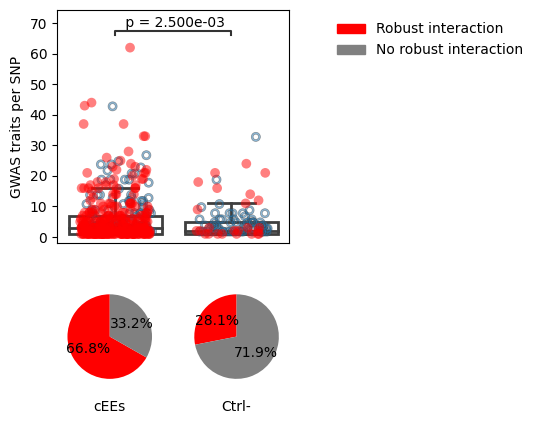

In [8]:
import matplotlib.gridspec as gridspec
from statannot import add_stat_annotation

#============================================================
# Create one figure with GridSpec (2 rows, 2 columns)
#============================================================
fig = plt.figure(figsize=(3, 5))
gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[2, 1])

#------------------------------------------------------------
# TOP SUBPLOT (spans both columns) - the strip + box plot
#------------------------------------------------------------
ax_top = fig.add_subplot(gs[0, :])  # first row, spanning both columns

# ---- PLOT 1 Code ----
sns.stripplot(
    x='Dataset',
    y='#traits',
    data=combined_data[combined_data['Interactions'] == 'Not robust'],
    hue='Interactions',
    jitter=0.3,  # Add jitter to scatter points
    size=10,     # Adjust point size
    marker="$\circ$", ec="face",
    linewidth=0.5,  # Set border thickness
    alpha=0.5,   # Set transparency
    ax=ax_top,
    legend=False
)

sns.stripplot(
    x='Dataset',
    y='#traits',
    data=combined_data[combined_data['Interactions'] == 'Robust'],
    hue='Interactions',
    palette=["red"],
    edgecolor=None,
    jitter=0.3,
    size=7,
    alpha=0.5,
    ax=ax_top,
    legend=False
)

box_ax = sns.boxplot(
    x='Dataset',
    y='#traits',
    data=combined_data,
    showfliers=False,
    order=["E.E", "Ctrl-"],
    boxprops=dict(facecolor='none'),
    linewidth=2,
    ax=ax_top
)

# Add stat annotation
add_stat_annotation(box_ax, 
                    data=combined_data, 
                    x='Dataset', 
                    y='#traits',
                    box_pairs=[("E.E", "Ctrl-")],
                    pvalues=[0.0025],
                    test=None,
                    perform_stat_test=False,
                    text_format='full', 
                    loc='inside', 
                    verbose=2)

ax_top.set_xlabel(None)
ax_top.set_xticks([])
ax_top.set_xticklabels([])
ax_top.set_ylabel('GWAS traits per SNP')

#------------------------------------------------------------
# BOTTOM SUBPLOTS - the two pie charts side-by-side
#------------------------------------------------------------
ax_bottom_left = fig.add_subplot(gs[1, 0])  # second row, first column
ax_bottom_right = fig.add_subplot(gs[1, 1]) # second row, second column

# ---- PLOT 2 Code ----
# Pie chart 1
data1 = [66.76, 100-66.76]
colors1 = ['red', 'gray']
ax_bottom_left.pie(
    data1,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors1
)

# Pie chart 2
data2 = [28.09, 100-28.09]
colors2 = ['red', 'gray']
ax_bottom_right.pie(
    data2,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors2
)

ax_bottom_left.text(
    0.5,                # x-position in axes fraction
    -0.1,               # y-position in axes fraction (below the plot area)
    "cEEs",           # your text
    transform=ax_bottom_left.transAxes,  # coordinate system = axes
    ha='center',        # center horizontally
    va='top'            # top alignment (so that the text flows upward)
)

ax_bottom_right.text(
    0.5,                # x-position in axes fraction
    -0.1,               # y-position in axes fraction (below the plot area)
    "Ctrl-",           # your text
    transform=ax_bottom_right.transAxes,  # coordinate system = axes
    ha='center',        # center horizontally
    va='top'            # top alignment (so that the text flows upward)
)

## legend
import matplotlib.patches as mpatches
patch_robust = mpatches.Patch(color='red', label='Robust')
patch_other  = mpatches.Patch(color='gray', label='Other')

ax_top.legend([patch_robust,patch_other], ["Robust interaction","No robust interaction"], bbox_to_anchor=(1.15, 1), frameon=False)



# Adjust layout
plt.tight_layout()

plt.savefig("/home/mouren/Images/supplementary_figures/supp_fig7/gwas_watanabe.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/supplementary_figures/supp_fig7/gwas_watanabe.png", format="png", bbox_inches="tight", dpi=450)

plt.show()
